# Lab 1: Ensemble Learning - Part B
# Predicting Item Sales using Boosting Algorithms

**Objective:** Use AdaBoost, Gradient Boosting (GBM), and XGBoost algorithms to predict item sales from the BigMart dataset.

---

## 1. Import Required Python Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Boosting Algorithms
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore the Dataset

In [2]:
# Load the BigMart dataset
df = pd.read_csv('bigmart_sales.csv')

# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Display last few rows
print("Last 5 rows of the dataset:")
df.tail()

Last 5 rows of the dataset:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


## 3. Exploratory Data Analysis (EDA)

### 3.1 Basic Dataset Information

In [4]:
# Dataset shape
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset Shape: (8523, 12)
Number of rows: 8523
Number of columns: 12


In [5]:
# Column names
print("Column Names:")
print(df.columns.tolist())

Column Names:
['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


In [6]:
# Data types and non-null counts
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Statistical summary for numerical columns
print("Statistical Summary (Numerical):")
df.describe()

Statistical Summary (Numerical):


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# Statistical summary for categorical columns
print("Statistical Summary (Categorical):")
df.describe(include='object')

Statistical Summary (Categorical):


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


### 3.2 Missing Values Analysis

In [9]:
# Check for missing values
print("Missing Values Analysis:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage.round(2)
})
print(missing_df)

Missing Values Analysis:
                           Missing Values  Percentage
Item_Identifier                         0        0.00
Item_Weight                          1463       17.17
Item_Fat_Content                        0        0.00
Item_Visibility                         0        0.00
Item_Type                               0        0.00
Item_MRP                                0        0.00
Outlet_Identifier                       0        0.00
Outlet_Establishment_Year               0        0.00
Outlet_Size                          2410       28.28
Outlet_Location_Type                    0        0.00
Outlet_Type                             0        0.00
Item_Outlet_Sales                       0        0.00


### 3.3 Duplicate Values Analysis

In [11]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### 3.4 Target Variable Analysis

In [12]:
# Target variable statistics
target_col = 'Item_Outlet_Sales'
print(f"Target Variable: {target_col}")
print(f"\nTarget Variable Statistics:")
print(df[target_col].describe())

Target Variable: Item_Outlet_Sales

Target Variable Statistics:
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


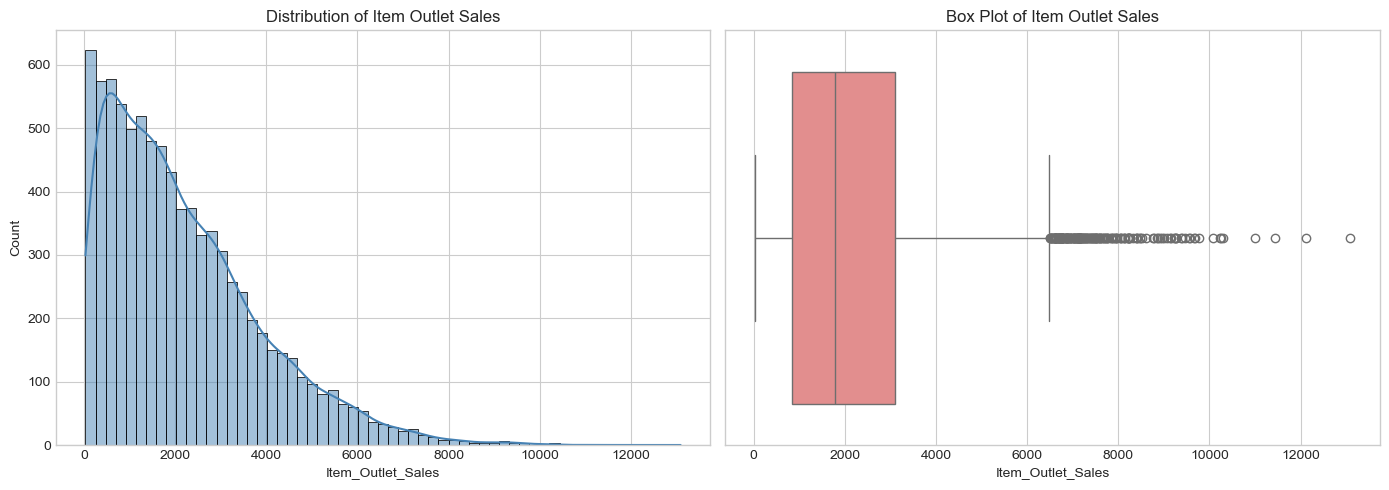

In [13]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[target_col], kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Distribution of Item Outlet Sales')

sns.boxplot(x=df[target_col], ax=axes[1], color='lightcoral')
axes[1].set_title('Box Plot of Item Outlet Sales')

plt.tight_layout()
plt.show()

### 3.5 Categorical Variables Analysis

In [14]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")

Categorical columns (7): ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

Numerical columns (5): ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [15]:
# Unique values in categorical columns
print("Unique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())

Unique Values in Categorical Columns:

Item_Identifier: 1559 unique values
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Item_Fat_Content: 5 unique values
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type: 16 unique values
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Identifier: 10 unique valu

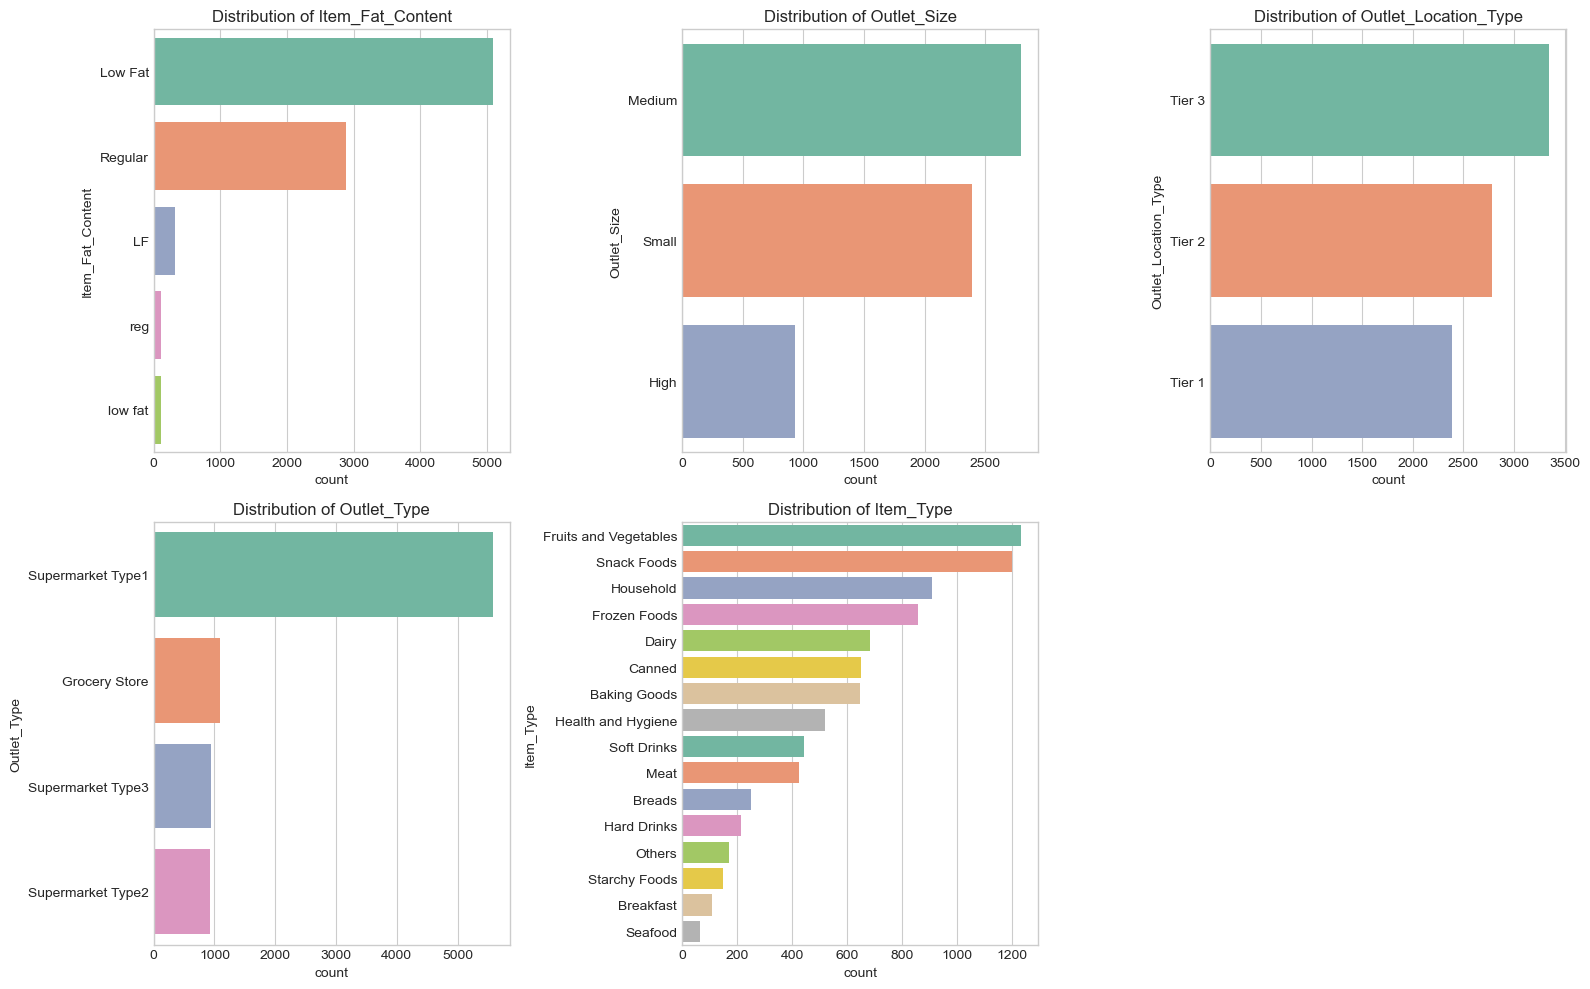

In [ ]:
# Visualize categorical variables
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

plot_cols = ['Item_Fat_Content', 
             'Outlet_Size', 
             'Outlet_Location_Type', 
             'Outlet_Type', 
             'Item_Type']

for idx, col in enumerate(plot_cols):
    if col in df.columns:
        sns.countplot(y=col, data=df, ax=axes[idx], palette='Set2', 
                      order=df[col].value_counts().index)
        axes[idx].set_title(f'Distribution of {col}')

axes[5].set_visible(False)
plt.tight_layout()
plt.show()

### 3.6 Numerical Variables Analysis

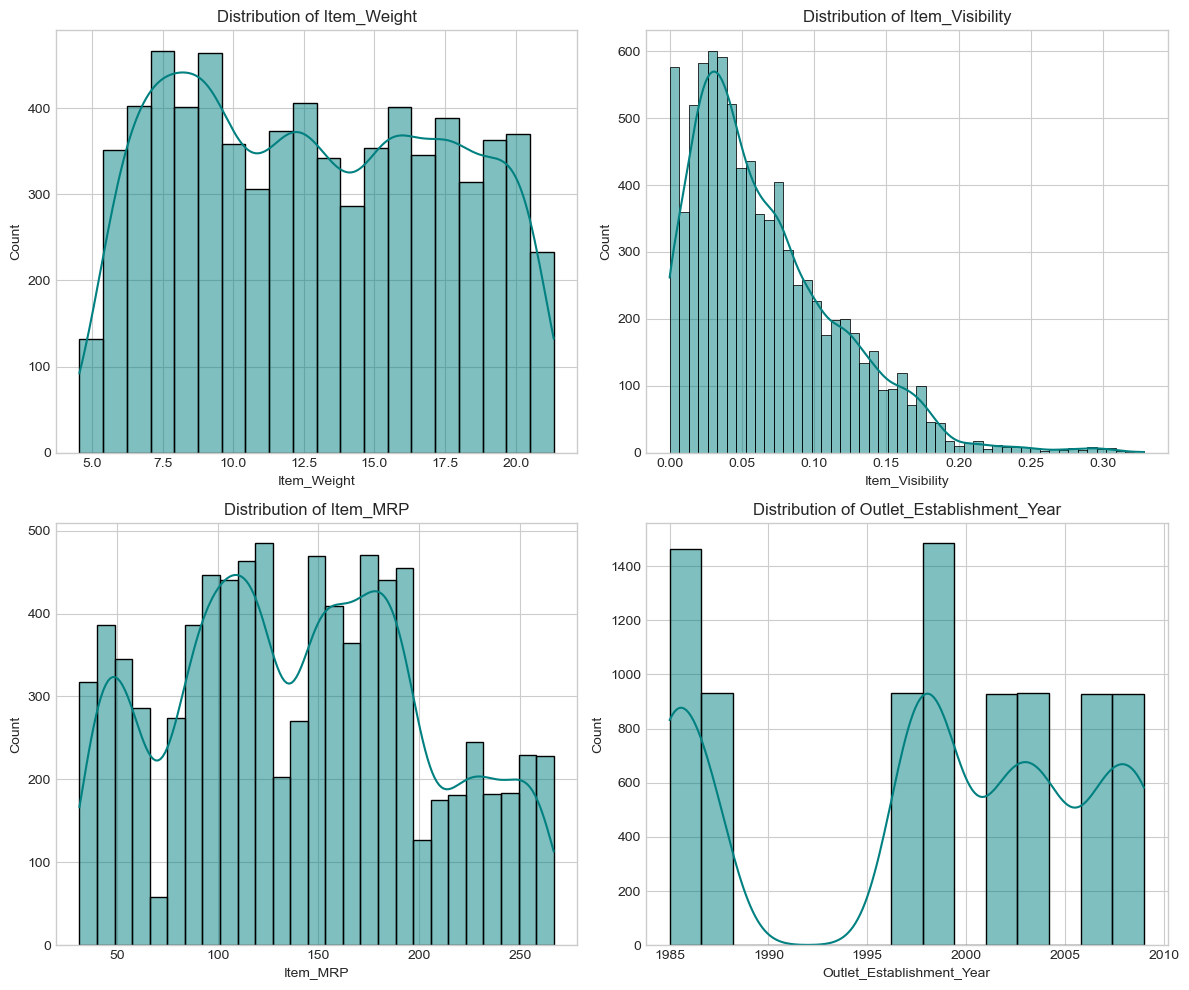

In [17]:
# Distribution of numerical features
num_features = [col for col in numerical_cols if col != target_col]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, col in enumerate(num_features[:4]):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[idx], color='teal')
    axes[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

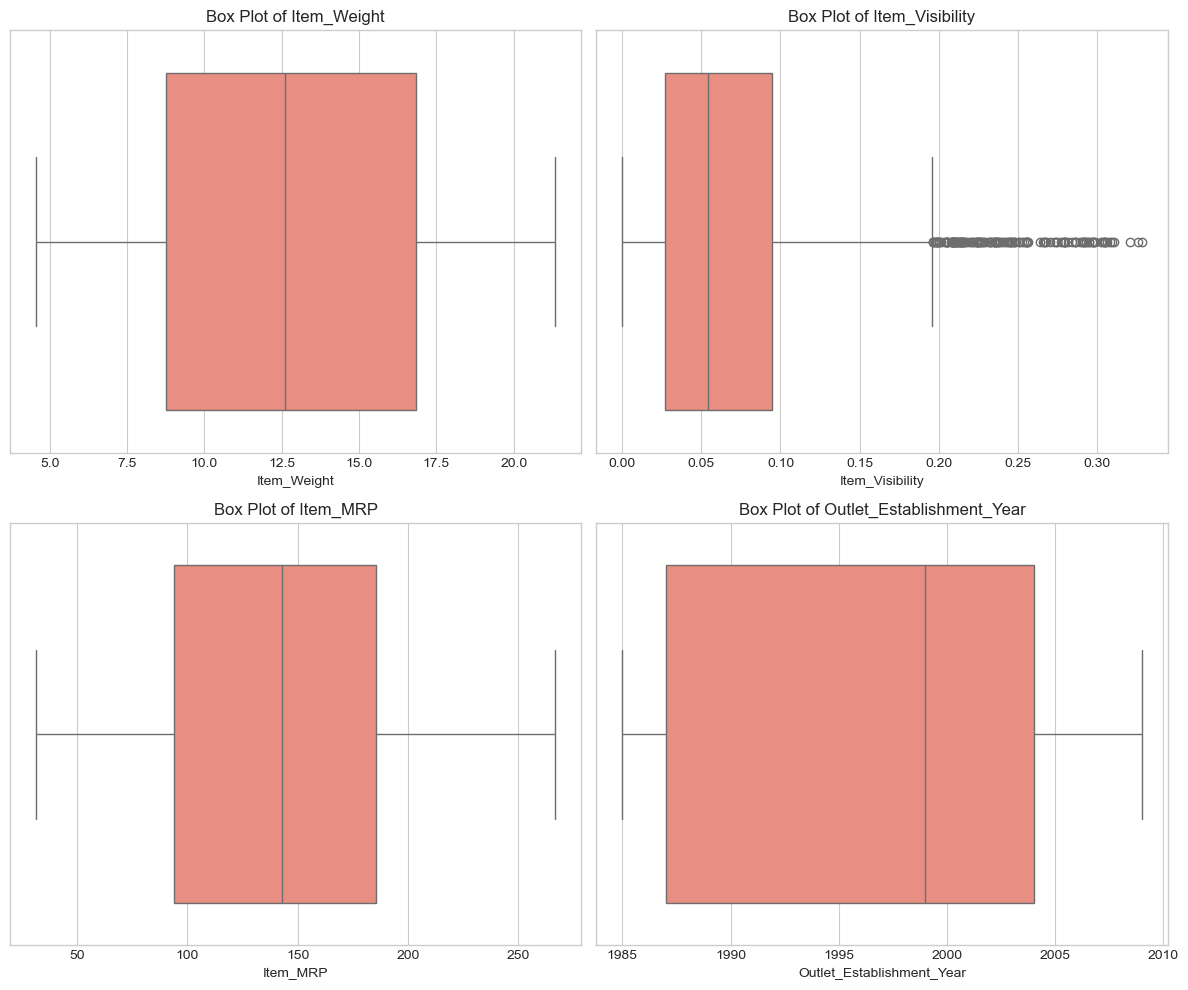

In [18]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, col in enumerate(num_features[:4]):
    sns.boxplot(x=df[col], ax=axes[idx], color='salmon')
    axes[idx].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

### 3.7 Correlation Analysis

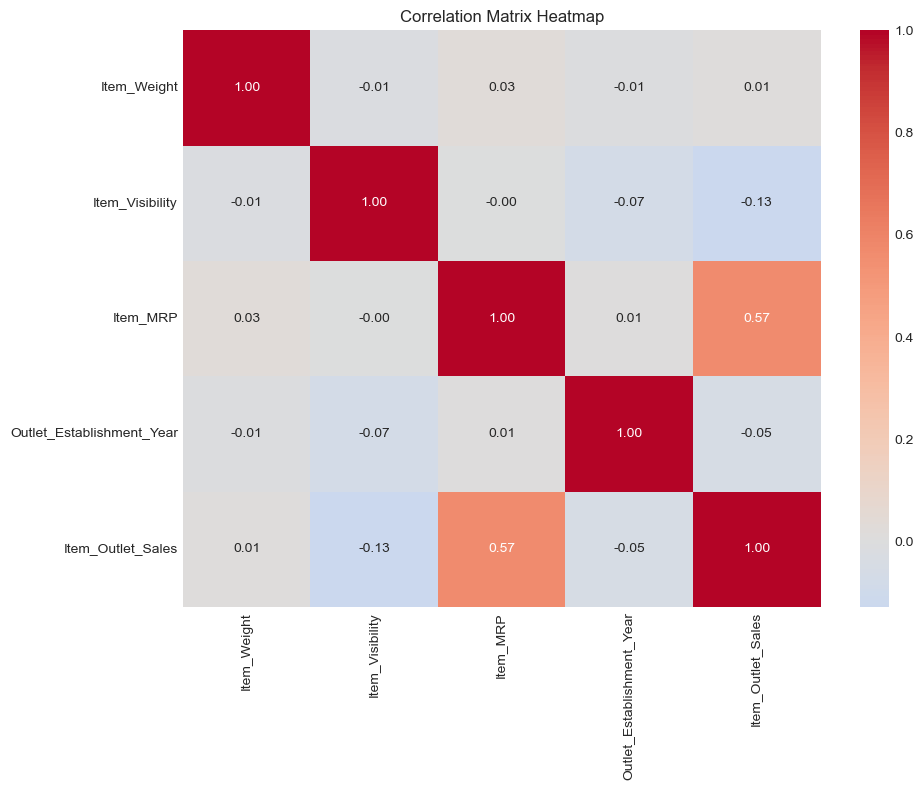

In [19]:
# Correlation matrix
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [20]:
# Correlation with target
print("Correlation with Target Variable:")
print(correlation_matrix[target_col].sort_values(ascending=False))

Correlation with Target Variable:
Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


### 3.8 Feature vs Target Analysis

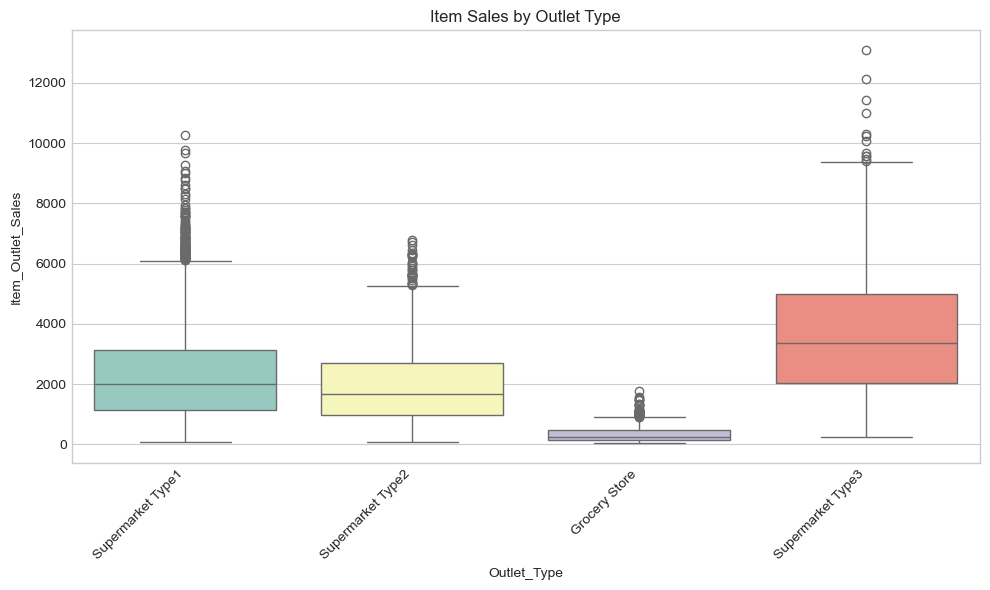

In [21]:
# Sales by Outlet Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette='Set3')
plt.title('Item Sales by Outlet Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

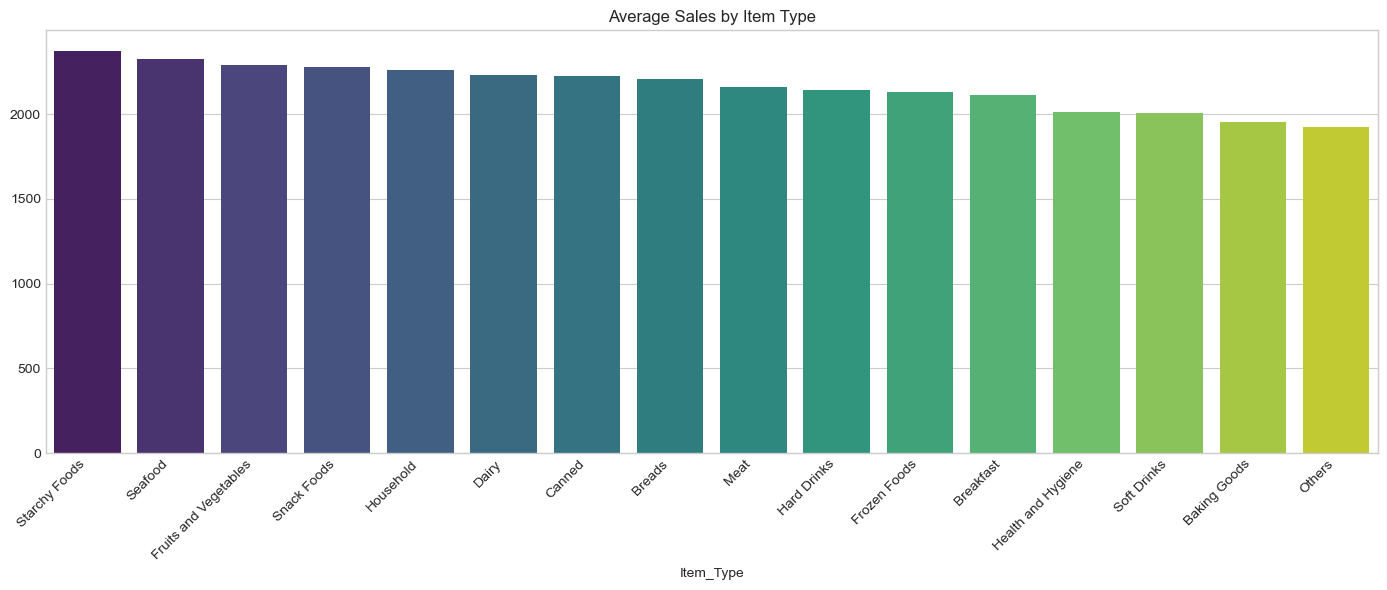

In [22]:
# Sales by Item Type
plt.figure(figsize=(14, 6))
sales_by_item = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
sns.barplot(x=sales_by_item.index, y=sales_by_item.values, palette='viridis')
plt.title('Average Sales by Item Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

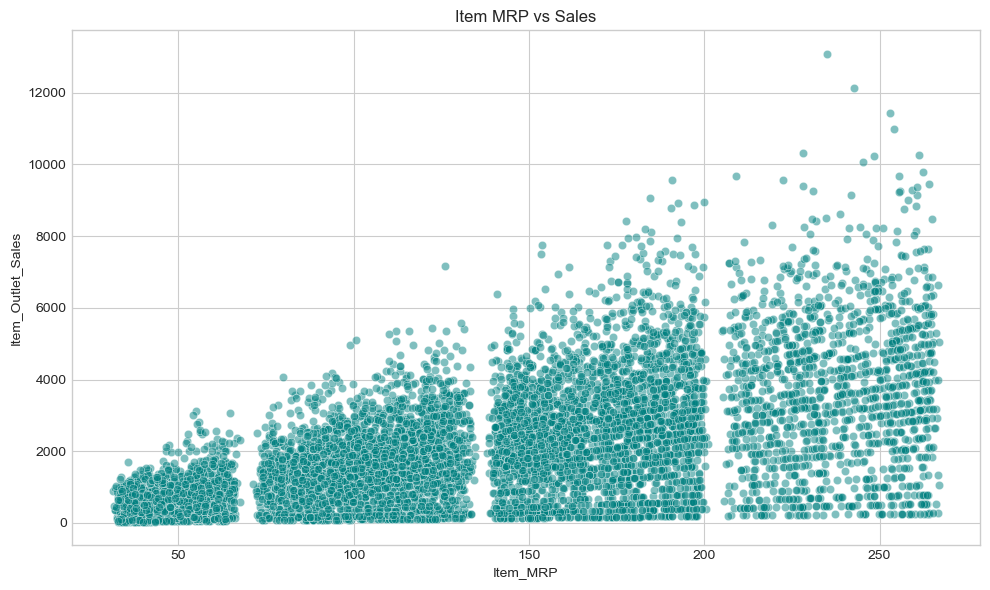

In [23]:
# Scatter: Item MRP vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, alpha=0.5, color='teal')
plt.title('Item MRP vs Sales')
plt.tight_layout()
plt.show()

## 4. Feature Engineering and Feature Selection

### 4.1 Handle Missing Values

In [24]:
# Create a copy for preprocessing
df_clean = df.copy()

print("Missing values before handling:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Missing values before handling:
Item_Weight    1463
Outlet_Size    2410
dtype: int64


In [25]:
# Fill Item_Weight with mean
if 'Item_Weight' in df_clean.columns:
    df_clean['Item_Weight'].fillna(df_clean['Item_Weight'].mean(), inplace=True)

# Fill Outlet_Size with mode
if 'Outlet_Size' in df_clean.columns:
    df_clean['Outlet_Size'].fillna(df_clean['Outlet_Size'].mode()[0], inplace=True)

print("Missing values after handling:")
print(df_clean.isnull().sum().sum())

Missing values after handling:
0


### 4.2 Handle Inconsistent Values

In [26]:
# Standardize Item_Fat_Content
print("Before standardization:", df_clean['Item_Fat_Content'].unique())

df_clean['Item_Fat_Content'] = df_clean['Item_Fat_Content'].replace({
    'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'
})

print("After standardization:", df_clean['Item_Fat_Content'].unique())

Before standardization: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
After standardization: ['Low Fat' 'Regular']


### 4.3 Feature Engineering

In [27]:
# Create new features
df_clean['Outlet_Age'] = 2025 - df_clean['Outlet_Establishment_Year']
df_clean['Item_Category'] = df_clean['Item_Identifier'].apply(lambda x: x[:2])
df_clean['MRP_Category'] = pd.cut(df_clean['Item_MRP'], 
                                   bins=[0, 70, 140, 200, 300],
                                   labels=['Low', 'Medium', 'High', 'Very High'])

print("New features created: Outlet_Age, Item_Category, MRP_Category")
df_clean.head()

New features created: Outlet_Age, Item_Category, MRP_Category


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Category,MRP_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26,FD,Very High
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,16,DR,Low
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,26,FD,High
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,27,FD,High
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,38,NC,Low


### 4.4 Encode Categorical Variables

In [28]:
# Drop ID columns
df_encoded = df_clean.drop(['Item_Identifier', 'Outlet_Identifier', 
                            'Outlet_Establishment_Year'], axis=1)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

print(f"Shape after encoding: {df_encoded.shape}")

Shape after encoding: (8523, 33)


### 4.5 Feature Selection

In [29]:
# Separate features and target
X = df_encoded.drop('Item_Outlet_Sales', axis=1)
y = df_encoded['Item_Outlet_Sales']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (8523, 32)
Target shape: (8523,)


In [30]:
# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print("Top 15 Features:")
print(feature_scores.head(15))

Top 15 Features:
                            Feature        Score
2                          Item_MRP  4049.456229
31           MRP_Category_Very High  1581.910075
26    Outlet_Type_Supermarket Type3   913.656782
29              MRP_Category_Medium   468.389840
30                MRP_Category_High   329.832040
1                   Item_Visibility   143.345451
24    Outlet_Type_Supermarket Type1   102.009171
21                Outlet_Size_Small    83.316380
20               Outlet_Size_Medium    48.401311
22      Outlet_Location_Type_Tier 2    29.022072
3                        Outlet_Age    20.621570
23      Outlet_Location_Type_Tier 3    18.366051
25    Outlet_Type_Supermarket Type2    12.360167
27                 Item_Category_FD     8.682665
10  Item_Type_Fruits and Vegetables     5.741739


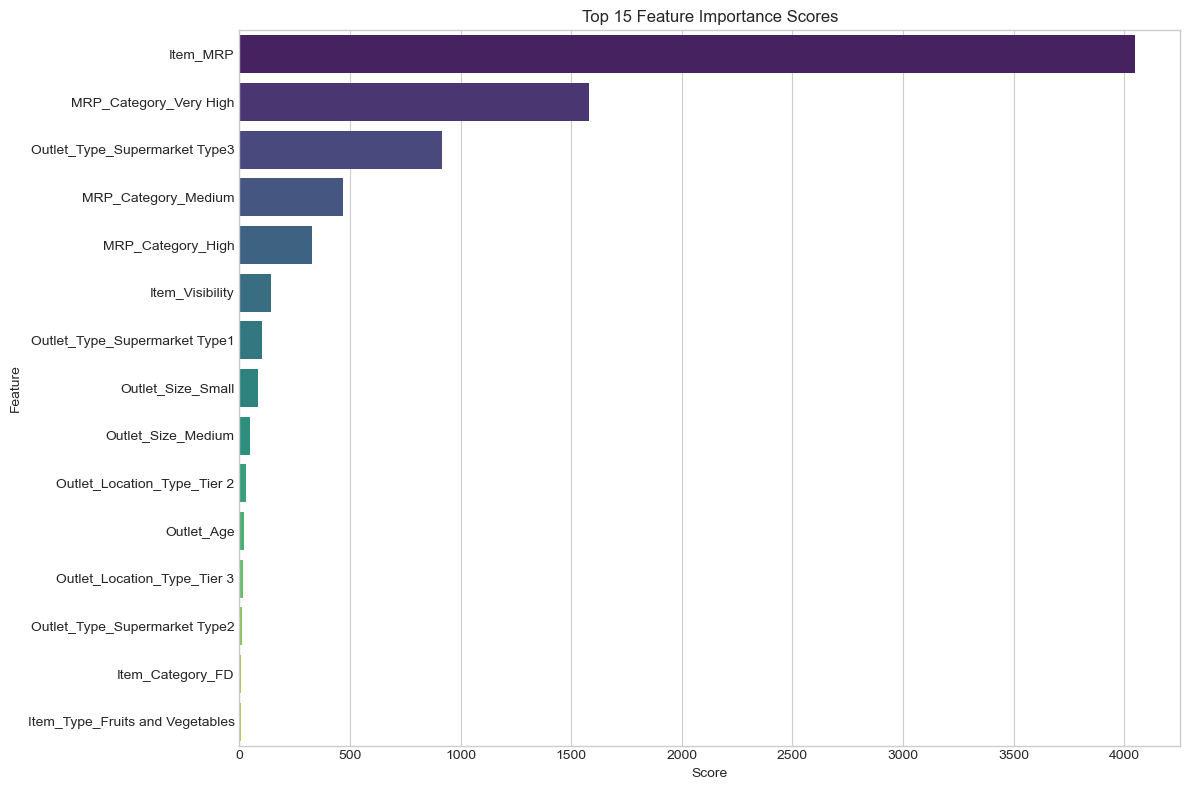

In [31]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores.head(15), palette='viridis')
plt.title('Top 15 Feature Importance Scores')
plt.tight_layout()
plt.show()

In [32]:
# Select top 15 features
selected_features = feature_scores.head(15)['Feature'].tolist()
X_selected = X[selected_features]
print(f"Selected features: {len(selected_features)}")

Selected features: 15


### 4.6 Train-Test Split

In [33]:
# Split the data (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 6818 samples
Testing set: 1705 samples


## 5. Apply Boosting Algorithms

### 5.1 AdaBoost Regressor

In [34]:
# Initialize and train AdaBoost
ada_regressor = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
ada_regressor.fit(X_train, y_train)
ada_pred = ada_regressor.predict(X_test)

# Evaluate
ada_rmse = np.sqrt(mean_squared_error(y_test, ada_pred))
ada_mae = mean_absolute_error(y_test, ada_pred)
ada_r2 = r2_score(y_test, ada_pred)

print("AdaBoost Performance:")
print(f"  RMSE: {ada_rmse:.4f}")
print(f"  MAE: {ada_mae:.4f}")
print(f"  R2 Score: {ada_r2:.4f}")

AdaBoost Performance:
  RMSE: 1191.8771
  MAE: 918.7241
  R2 Score: 0.4773


### 5.2 Gradient Boosting Regressor (GBM)

In [35]:
# Initialize and train GBM
gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, 
                                          max_depth=5, random_state=42)
gbm_regressor.fit(X_train, y_train)
gbm_pred = gbm_regressor.predict(X_test)

# Evaluate
gbm_rmse = np.sqrt(mean_squared_error(y_test, gbm_pred))
gbm_mae = mean_absolute_error(y_test, gbm_pred)
gbm_r2 = r2_score(y_test, gbm_pred)

print("Gradient Boosting Performance:")
print(f"  RMSE: {gbm_rmse:.4f}")
print(f"  MAE: {gbm_mae:.4f}")
print(f"  R2 Score: {gbm_r2:.4f}")

Gradient Boosting Performance:
  RMSE: 1052.1487
  MAE: 732.1053
  R2 Score: 0.5927


### 5.3 XGBoost Regressor

In [36]:
# Initialize and train XGBoost
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, 
                             max_depth=5, random_state=42, verbosity=0)
xgb_regressor.fit(X_train, y_train)
xgb_pred = xgb_regressor.predict(X_test)

# Evaluate
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print("XGBoost Performance:")
print(f"  RMSE: {xgb_rmse:.4f}")
print(f"  MAE: {xgb_mae:.4f}")
print(f"  R2 Score: {xgb_r2:.4f}")

XGBoost Performance:
  RMSE: 1053.1467
  MAE: 730.8987
  R2 Score: 0.5919


## 6. Model Comparison and Evaluation

In [37]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['AdaBoost', 'Gradient Boosting', 'XGBoost'],
    'RMSE': [ada_rmse, gbm_rmse, xgb_rmse],
    'MAE': [ada_mae, gbm_mae, xgb_mae],
    'R2 Score': [ada_r2, gbm_r2, xgb_r2]
})

print("Model Comparison:")
comparison_df

Model Comparison:


,Model,RMSE,MAE,R2 Score
0,AdaBoost,1191.877106,918.724087,0.477341
1,Gradient Boosting,1052.148664,732.105283,0.592705
2,XGBoost,1053.146710,730.898654,0.591931


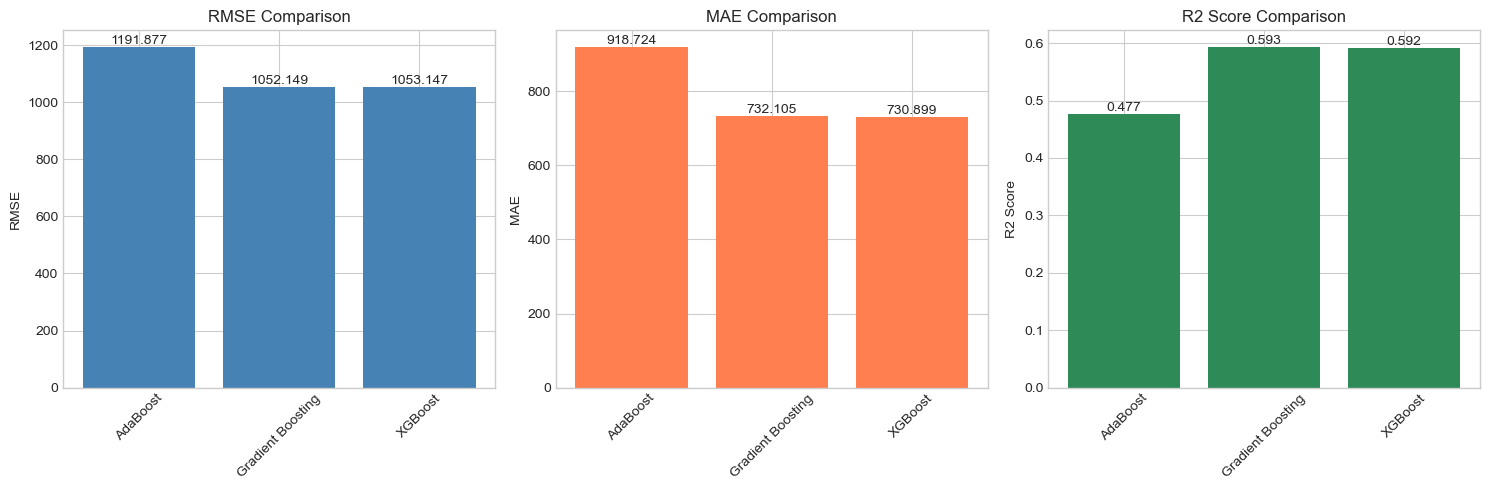

In [38]:
# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['steelblue', 'coral', 'seagreen']

for idx, metric in enumerate(['RMSE', 'MAE', 'R2 Score']):
    bars = axes[idx].bar(comparison_df['Model'], comparison_df[metric], color=colors[idx])
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].set_ylabel(metric)
    axes[idx].tick_params(axis='x', rotation=45)
    for bar, val in zip(bars, comparison_df[metric]):
        axes[idx].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                      f'{val:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

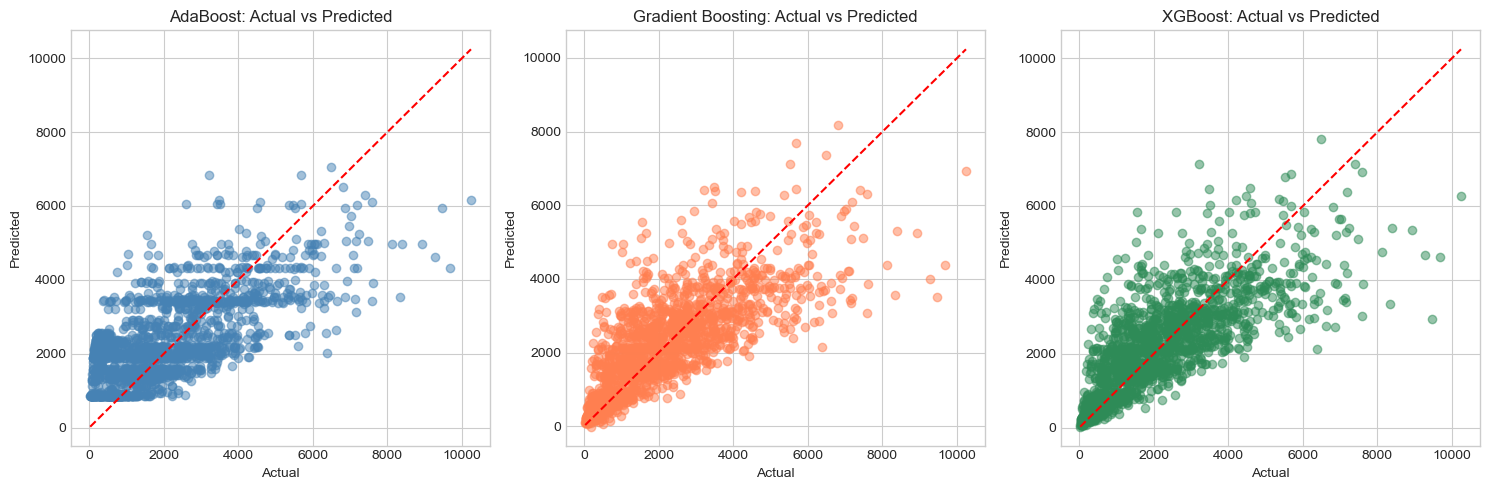

In [39]:
# Actual vs Predicted plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
models = ['AdaBoost', 'Gradient Boosting', 'XGBoost']
predictions = [ada_pred, gbm_pred, xgb_pred]

for idx, (model, pred) in enumerate(zip(models, predictions)):
    axes[idx].scatter(y_test, pred, alpha=0.5, color=colors[idx])
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axes[idx].set_title(f'{model}: Actual vs Predicted')
    axes[idx].set_xlabel('Actual')
    axes[idx].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

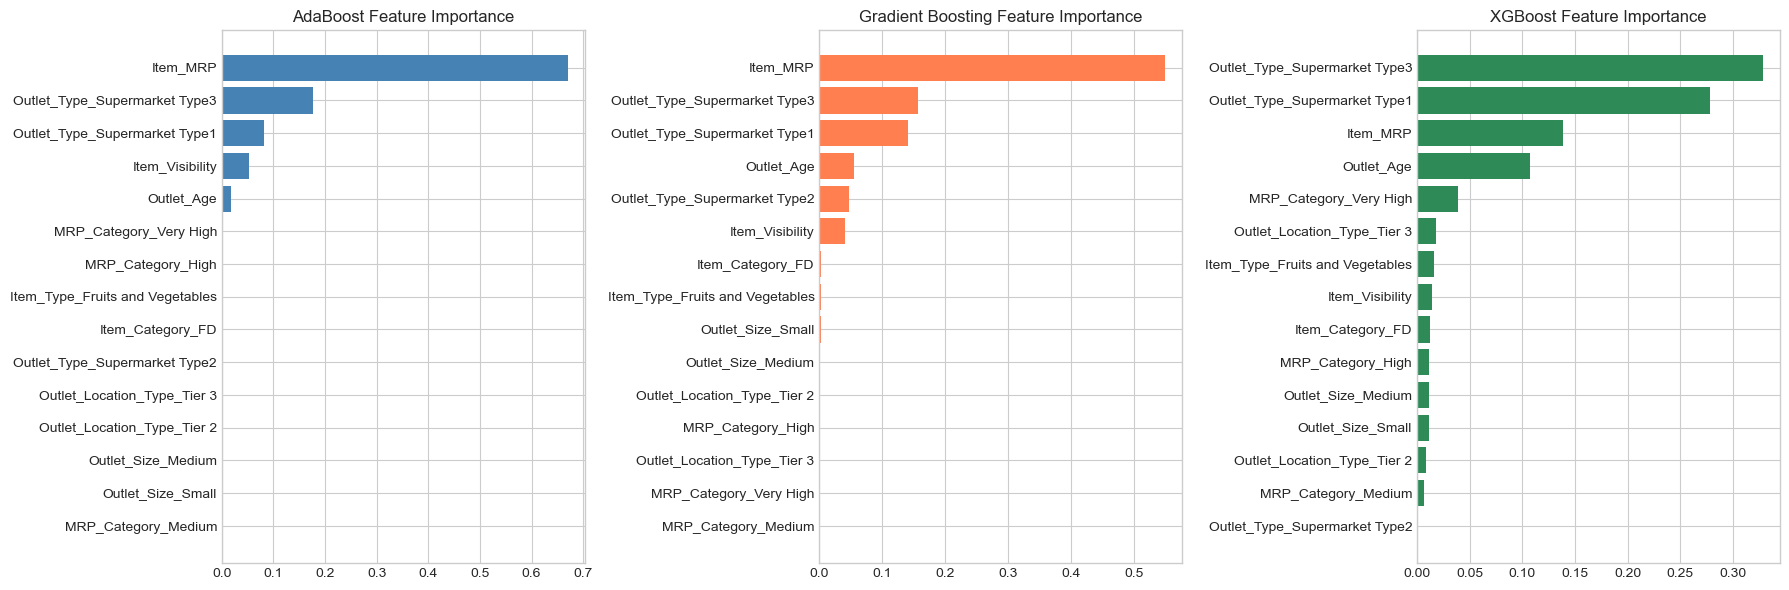

In [40]:
# Feature importance comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
regressors = [ada_regressor, gbm_regressor, xgb_regressor]

for idx, (model, reg) in enumerate(zip(models, regressors)):
    importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': reg.feature_importances_
    }).sort_values('Importance', ascending=True)
    
    axes[idx].barh(importance_df['Feature'], importance_df['Importance'], color=colors[idx])
    axes[idx].set_title(f'{model} Feature Importance')

plt.tight_layout()
plt.show()

## 7. Summary

In [41]:
print("="*70)
print("SUMMARY: ITEM SALES PREDICTION USING BOOSTING ALGORITHMS")
print("="*70)

print(f"\nDataset: BigMart Sales")
print(f"Total samples: {len(df)}")
print(f"Features used: {len(selected_features)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

print(f"\nModel Performance:")
print(comparison_df.to_string(index=False))

best_idx = comparison_df['R2 Score'].idxmax()
print(f"\nBest Model: {comparison_df.loc[best_idx, 'Model']}")
print(f"Best R2 Score: {comparison_df.loc[best_idx, 'R2 Score']:.4f}")

print("\n" + "="*70)
print("Boosting Algorithms Successfully Implemented!")
print("="*70)

SUMMARY: ITEM SALES PREDICTION USING BOOSTING ALGORITHMS

Dataset: BigMart Sales
Total samples: 8523
Features used: 15
Training samples: 6818
Testing samples: 1705

Model Performance:
            Model        RMSE        MAE  R2 Score
         AdaBoost 1191.877106 918.724087  0.477341
Gradient Boosting 1052.148664 732.105283  0.592705
          XGBoost 1053.146710 730.898654  0.591931

Best Model: Gradient Boosting
Best R2 Score: 0.5927

Boosting Algorithms Successfully Implemented!
